In [ ]:
#1. EDA -> understanding the data -> a lof feature Engineering / Preprocessing
#. 1. a. I can proceed to model building even before fully understanding the data
#         - have base submissions - use that as benchmark and then proceed towards improving
#2. Build some benchmark models first

In [37]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train_Inceptez20.csv")

In [3]:
train.shape

(50000, 44)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         50000 non-null  object 
 1   policy_tenure                     50000 non-null  float64
 2   age_of_car                        50000 non-null  float64
 3   age_of_policyholder               50000 non-null  float64
 4   area_cluster                      50000 non-null  object 
 5   population_density                50000 non-null  int64  
 6   make                              50000 non-null  int64  
 7   segment                           50000 non-null  object 
 8   model                             50000 non-null  object 
 9   fuel_type                         50000 non-null  object 
 10  max_torque                        50000 non-null  object 
 11  max_power                         50000 non-null  object 
 12  engi

In [5]:
train.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [7]:
train['is_claim'].value_counts()[0]/50000

0.93542

In [8]:
train_cat = train.select_dtypes(include = 'object').columns

In [9]:
train_cat

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [10]:
for i in train.select_dtypes(include = 'object').columns:
  print(train[i].value_counts())

ID00001    1
ID33351    1
ID33329    1
ID33330    1
ID33331    1
          ..
ID16669    1
ID16670    1
ID16671    1
ID16672    1
ID50000    1
Name: policy_id, Length: 50000, dtype: int64
C8     11658
C2      6207
C5      5979
C3      5216
C14     3140
C13     2917
C10     2714
C9      2326
C7      1851
C12     1345
C1      1259
C11     1043
C19      814
C6       754
C15      658
C4       570
C17      426
C16      335
C21      320
C18      200
C22      179
C20       89
Name: area_cluster, dtype: int64
B2         15615
A          14839
C2         11914
B1          3562
C1          3039
Utility     1031
Name: segment, dtype: int64
M1     12794
M4     11914
M6     11740
M8      3562
M7      2484
M3      2045
M9      1798
M5      1391
M10     1031
M2       929
M11      312
Name: model, dtype: int64
Petrol    17510
CNG       17387
Diesel    15103
Name: fuel_type, dtype: int64
113Nm@4400rpm     15153
60Nm@3500rpm      12794
250Nm@2750rpm     11914
82.1Nm@3400rpm     3562
91Nm@4250rpm       2

In [11]:
for i in train_cat:
  train[i] = train[i].astype('category')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   policy_id                         50000 non-null  category
 1   policy_tenure                     50000 non-null  float64 
 2   age_of_car                        50000 non-null  float64 
 3   age_of_policyholder               50000 non-null  float64 
 4   area_cluster                      50000 non-null  category
 5   population_density                50000 non-null  int64   
 6   make                              50000 non-null  int64   
 7   segment                           50000 non-null  category
 8   model                             50000 non-null  category
 9   fuel_type                         50000 non-null  category
 10  max_torque                        50000 non-null  category
 11  max_power                         50000 non-null  cate

In [13]:
train['airbags'].value_counts()

2    34571
6    14398
1     1031
Name: airbags, dtype: int64

In [14]:
train['make'].value_counts()

1    32540
3    11914
2     2045
5     1798
4     1703
Name: make, dtype: int64

In [15]:
train['cylinder'].value_counts()

4    31287
3    18713
Name: cylinder, dtype: int64

In [16]:
train['gear_box'].value_counts()

5    37774
6    12226
Name: gear_box, dtype: int64

In [17]:
train['ncap_rating'].value_counts()

2    18276
0    16309
3    11914
4     1798
5     1703
Name: ncap_rating, dtype: int64

In [18]:
train['airbags'] = train['airbags'].astype('category')
train['make'] = train['make'].astype('category')
train['cylinder'] = train['cylinder'].astype('category')
train['gear_box'] = train['gear_box'].astype('category')
train['ncap_rating'] = train['ncap_rating'].astype('category')
#train['airbags'] = train['airbags'].astype('category')
train['is_claim'] = train['is_claim'].astype('category')


In [19]:
train.duplicated().sum()

0

In [20]:
train.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [21]:
train.shape

(50000, 44)

In [22]:
#This is the step before we try to build the model.
#before even we split it into train and validation

In [23]:
X = train.drop(['is_claim'],axis = 1)
y = train['is_claim']

In [25]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42,replacement = True)
X_rus, y_rus = rus.fit_resample(X,y)


print("original:", X.shape)
print("Resampled:", X_rus.shape)

original: (50000, 43)
Resampled: (6458, 43)


In [26]:
df_new = pd.concat([X_rus,y_rus],axis = 1)

In [27]:
df_new.drop(columns = ['policy_id'],inplace = True)

In [ ]:
#1. Feature importance - Random forest - Features imp for prediction
#2. XGB - Important features - XGB
#3. XGB - Grid
#4. Logistic
#5. Logistic Grid
#6. Voting Classifier - Stacking -

In [28]:
data = df_new.sample(frac = 0.85, random_state = 24)
data_unseen = df_new.drop(data.index)


data.reset_index(inplace = True, drop = True)

In [29]:
data_unseen.reset_index(inplace = True, drop = True)

In [30]:
data.shape

(5489, 43)

In [31]:
data_unseen.shape

(969, 43)

In [32]:
from pycaret.classification import *
dataset = setup(data= data,target = 'is_claim')

,Description,Value
0,Session id,4988
1,Target,is_claim
2,Target type,Binary
3,Original data shape,"(5489, 43)"
4,Transformed data shape,"(5489, 119)"
5,Transformed train set shape,"(3842, 119)"
6,Transformed test set shape,"(1647, 119)"
7,Ordinal features,21
8,Numeric features,10
9,Categorical features,32


In [33]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6054,0.6536,0.6486,0.5912,0.6181,0.2117,0.2132,2.1380
ada,Ada Boost Classifier,0.6051,0.6325,0.6449,0.5915,0.6165,0.2111,0.2125,1.5210
ridge,Ridge Classifier,0.5877,0.0000,0.5889,0.5807,0.5846,0.1754,0.1756,0.9850
lightgbm,Light Gradient Boosting Machine,0.5864,0.6217,0.5942,0.5790,0.5863,0.1730,0.1731,1.2050
lda,Linear Discriminant Analysis,0.5846,0.6139,0.5842,0.5779,0.5808,0.1691,0.1693,1.1480
xgboost,Extreme Gradient Boosting,0.5796,0.6139,0.5678,0.5749,0.5709,0.1590,0.1592,3.1280
rf,Random Forest Classifier,0.5763,0.6047,0.5462,0.5743,0.5597,0.1519,0.1521,2.1250
et,Extra Trees Classifier,0.5601,0.5892,0.5430,0.5551,0.5487,0.1198,0.1200,2.3390
knn,K Neighbors Classifier,0.5396,0.5484,0.5214,0.5344,0.5276,0.0786,0.0787,1.5170
dt,Decision Tree Classifier,0.5388,0.5387,0.5282,0.5336,0.5305,0.0773,0.0775,0.8280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [34]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5922,0.6306,0.6632,0.5753,0.6161,0.1859,0.1880
1,0.6104,0.6554,0.6263,0.6010,0.6134,0.2211,0.2213
2,0.6172,0.6555,0.6842,0.5991,0.6388,0.2354,0.2378
3,0.5833,0.6759,0.6053,0.5750,0.5897,0.1670,0.1673
4,0.5990,0.6296,0.6316,0.5882,0.6091,0.1984,0.1990
5,0.5885,0.6245,0.5926,0.5803,0.5864,0.1772,0.1772
6,0.6198,0.6669,0.6508,0.6059,0.6276,0.2403,0.2409
7,0.6250,0.6667,0.6508,0.6119,0.6308,0.2505,0.2510
8,0.6016,0.6609,0.6508,0.5857,0.6165,0.2043,0.2055


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
tuned_gbc = tune_model(gbc,optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6078,0.6365,0.6526,0.5933,0.6216,0.2165,0.2175
1,0.6286,0.6492,0.6737,0.6124,0.6416,0.2580,0.2592
2,0.6146,0.6601,0.6737,0.5981,0.6337,0.2301,0.2319
3,0.5651,0.6438,0.6211,0.5540,0.5856,0.1312,0.1321
4,0.6016,0.6346,0.6526,0.5877,0.6185,0.2039,0.2052
5,0.6068,0.6274,0.6296,0.5950,0.6118,0.2141,0.2144
6,0.6432,0.6634,0.6931,0.6238,0.6566,0.2875,0.2892
7,0.5964,0.6473,0.6508,0.5802,0.6135,0.1940,0.1954
8,0.6354,0.6642,0.7037,0.6129,0.6552,0.2723,0.2752


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [37]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=2,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.4, min_samples_leaf=2,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=210, n_iter_no_change=None,
                           random_state=4988, subsample=0.55, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


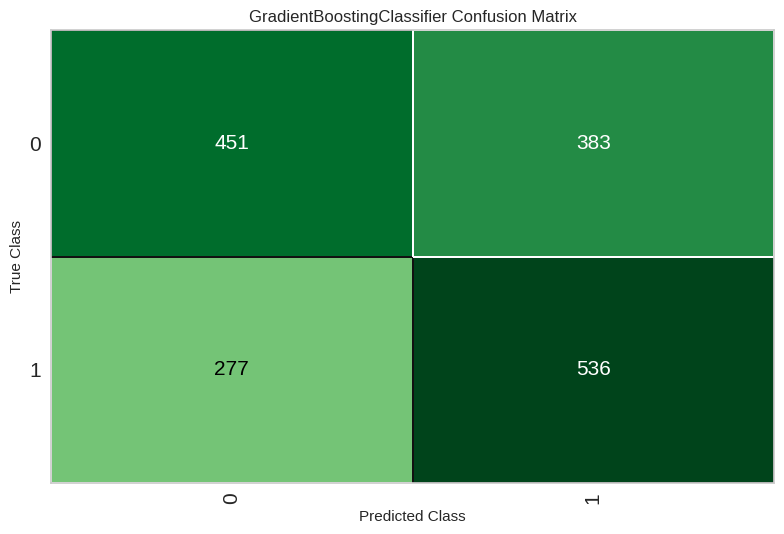

In [38]:
plot_model(tuned_gbc,plot='confusion_matrix')

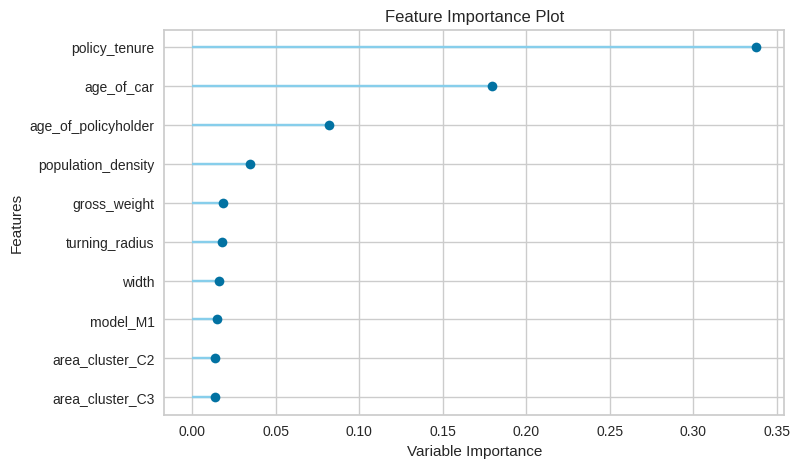

In [40]:
plot_model(tuned_gbc,plot= 'feature')

In [96]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6052,0.0000,0.6105,0.5979,0.6042,0.2105,0.2105
1,0.5636,0.0000,0.5526,0.5585,0.5556,0.1270,0.1270
2,0.5859,0.0000,0.5789,0.5820,0.5805,0.1717,0.1717
3,0.5443,0.0000,0.5368,0.5397,0.5383,0.0884,0.0884
4,0.6042,0.0000,0.6158,0.5969,0.6062,0.2085,0.2086
5,0.5938,0.0000,0.5979,0.5855,0.5916,0.1876,0.1876
6,0.5964,0.0000,0.5820,0.5914,0.5867,0.1923,0.1923
7,0.5703,0.0000,0.5450,0.5659,0.5553,0.1399,0.1400
8,0.6120,0.0000,0.6190,0.6031,0.6110,0.2241,0.2242


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [97]:
tuned_ridge = tune_model(ridge,optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6104,0.0000,0.6105,0.6042,0.6073,0.2208,0.2208
1,0.5688,0.0000,0.5737,0.5619,0.5677,0.1377,0.1378
2,0.5885,0.0000,0.5895,0.5833,0.5864,0.1771,0.1771
3,0.5599,0.0000,0.5737,0.5533,0.5633,0.1200,0.1201
4,0.6042,0.0000,0.6105,0.5979,0.6042,0.2084,0.2085
5,0.5990,0.0000,0.6032,0.5907,0.5969,0.1980,0.1980
6,0.5859,0.0000,0.5661,0.5815,0.5737,0.1713,0.1714
7,0.5807,0.0000,0.5503,0.5778,0.5637,0.1606,0.1608
8,0.6042,0.0000,0.6190,0.5939,0.6062,0.2087,0.2088


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [99]:
print(tuned_ridge)

RidgeClassifier(alpha=5.899999999999999, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, positive=False,
                random_state=4988, solver='auto', tol=0.0001)


In [100]:
final_ridge = finalize_model(tuned_ridge)

In [101]:
save_model(final_ridge,'inceptez_20_hackathon_model_ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['policy_tenure', 'age_of_car',
                                              'age_of_policyholder',
                                              'population_density',
                                              'displacement', 'turning_radius',
                                              'length', 'width', 'height',
                                              'gross_weight'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fea...
                                                                     'airbags',
                            

In [42]:
save_model(final_gbc,'inceptez_20_hackathon_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['policy_tenure', 'age_of_car',
                                              'age_of_policyholder',
                                              'population_density',
                                              'displacement', 'turning_radius',
                                              'length', 'width', 'height',
                                              'gross_weight'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fea...
                                             criterion='friedman_mse', init=None,
                          

In [43]:
unseen_pred = predict_model(final_gbc, data = data_unseen)
unseen_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6078,0.6378,0.6948,0.6209,0.6558,0.2035,0.2052


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,prediction_label,prediction_score
0,1.135573,0.18,0.567308,C14,7788,4,B2,M5,Diesel,200Nm@3000rpm,...,Yes,Yes,No,No,Yes,Yes,5,0,1,0.5794
1,0.457597,0.09,0.826923,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,4,0,1,0.5620
2,0.970623,0.08,0.432692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,1,0.6176
3,1.212612,0.16,0.557692,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,No,Yes,Yes,3,0,1,0.5591
4,1.079355,0.14,0.346154,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,No,Yes,Yes,3,0,1,0.5094


In [102]:
df_test = pd.read_csv("test_Inceptez20.csv")

In [103]:
for i in df_test:
  df_test[i] = df_test[i].astype('category')

In [104]:
df_test['airbags'] = df_test['airbags'].astype('category')
df_test['make'] = df_test['make'].astype('category')
df_test['cylinder'] = df_test['cylinder'].astype('category')
df_test['gear_box'] = df_test['gear_box'].astype('category')
df_test['ncap_rating'] = df_test['ncap_rating'].astype('category')
#train['airbags'] = train['airbags'].astype('category')
#df_test['is_claim'] = df_test['is_claim'].astype('category')

In [105]:
test_pred = df_test.drop(columns = ['policy_id'])

In [106]:
test_pred = predict_model(final_gbc, data = test_pred)

In [111]:
sub = pd.DataFrame(columns = ['policy_id','is_claim_gbc'])

In [112]:
test_pred.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,prediction_label,prediction_score
0,1.078602,0.14,0.346154,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1,0.5094
1,0.176011,0.15,0.471154,C21,3264,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.6714
2,0.088625,0.09,0.384615,C3,4076,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0,0.6918
3,1.174575,0.13,0.326923,C3,4076,2,A,M3,Petrol,91Nm@4250rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,1,0.5428
4,1.102165,0.15,0.509615,C2,27003,1,B1,M8,CNG,82.1Nm@3400rpm,...,Yes,Yes,Yes,No,No,Yes,Yes,2,1,0.5280


In [113]:
sub['is_claim_gbc'] = test_pred['prediction_label']
sub['policy_id'] = df_test['policy_id']

In [114]:
sub

,policy_id,is_claim_gbc
0,ID50001,1
1,ID50002,0
2,ID50003,0
3,ID50004,1
4,ID50005,1
...,...,...
8587,ID58588,0
8588,ID58589,1
8589,ID58590,0
8590,ID58591,1


In [53]:
sub.to_csv("submission_gbc_1.csv",index = False)

In [117]:
test_pred_ridge = predict_model(final_ridge, data = test_pred)

In [121]:
test_pred_ridge.iloc[:,-3]

0       1
1       0
2       0
3       1
4       1
       ..
8587    0
8588    1
8589    0
8590    1
8591    0
Name: prediction_label, Length: 8592, dtype: int8

In [122]:
sub['is_claim_ridge'] = test_pred_ridge.iloc[:,-3]

In [124]:
KNN = create_model('knn')
tuned_KNN = tune_model(KNN,optimize = 'F1')
test_pred = df_test.drop(columns = ['policy_id'])
test_pred_KNN = predict_model(tuned_KNN, data = test_pred)
sub['is_claim_KNN'] = test_pred_KNN['prediction_label']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5429,0.5730,0.5053,0.5393,0.5217,0.0848,0.0850
1,0.5558,0.5569,0.5158,0.5537,0.5341,0.1108,0.1110
2,0.5417,0.5486,0.5105,0.5389,0.5243,0.0827,0.0828
3,0.5417,0.5495,0.5632,0.5350,0.5487,0.0837,0.0838
4,0.5417,0.5469,0.5316,0.5372,0.5344,0.0831,0.0831
5,0.5547,0.5565,0.5238,0.5500,0.5366,0.1085,0.1086
6,0.5755,0.5772,0.5661,0.5691,0.5676,0.1508,0.1508
7,0.4740,0.4993,0.4709,0.4660,0.4684,-0.0522,-0.0522
8,0.5260,0.5294,0.5185,0.5185,0.5185,0.0519,0.0519


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5792,0.5832,0.5895,0.5714,0.5803,0.1586,0.1587
1,0.5896,0.6134,0.5947,0.5825,0.5885,0.1793,0.1793
2,0.5469,0.5763,0.5526,0.5412,0.5469,0.0938,0.0939
3,0.5547,0.5620,0.5684,0.5482,0.5581,0.1096,0.1097
4,0.5651,0.5901,0.5737,0.5590,0.5662,0.1303,0.1304
5,0.5911,0.6018,0.5820,0.5851,0.5836,0.1820,0.1820
6,0.5911,0.6006,0.5926,0.5833,0.5879,0.1823,0.1823
7,0.5443,0.5633,0.5608,0.5354,0.5478,0.0890,0.0891
8,0.5573,0.5583,0.5556,0.5497,0.5526,0.1145,0.1145


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [125]:
sub.head()

,policy_id,is_claim_gbc,is_claim_ridge,is_claim_KNN
0,ID50001,1,1,1
1,ID50002,0,0,0
2,ID50003,0,0,0
3,ID50004,1,1,1
4,ID50005,1,1,1


In [126]:
sub['is_claim'] = sub[["is_claim_gbc","is_claim_ridge","is_claim_KNN"]].apply(lambda x:x.mode(), axis = 1)

In [127]:
sub.head()

,policy_id,is_claim_gbc,is_claim_ridge,is_claim_KNN,is_claim
0,ID50001,1,1,1,1
1,ID50002,0,0,0,0
2,ID50003,0,0,0,0
3,ID50004,1,1,1,1
4,ID50005,1,1,1,1


In [128]:
sub[['policy_id','is_claim']].to_csv("submission_voting_KNN_ridge_gbc.csv",index = False)